## **14. Code: BFS**


### **Traverse a tree (breadth first search)**


We'll now practice implementing breadth first search (BFS). You'll see breadth first search again when we learn about graph data structures, so BFS is very useful to know.



### **Creating a sample tree**


We'll create a tree that looks like the following:



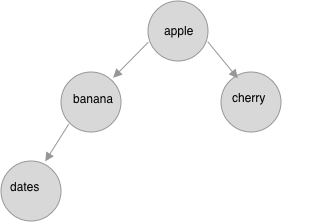

In [1]:
# this code makes the tree that we'll traverse

class Node(object):

    def __init__(self, value=None):
        self.value = value
        self.left = None
        self.right = None

    def set_value(self, value):
        self.value = value

    def get_value(self):
        return self.value

    def set_left_child(self, left):
        self.left = left

    def set_right_child(self, right):
        self.right = right

    def get_left_child(self):
        return self.left

    def get_right_child(self):
        return self.right

    def has_left_child(self):
        return self.left != None

    def has_right_child(self):
        return self.right != None

    # define __repr_ to decide what a print statement displays for a Node object
    def __repr__(self):
        return f"Node({self.get_value()})"

    def __str__(self):
        return f"Node({self.get_value()})"


class Tree():
    def __init__(self, value=None):
        self.root = Node(value)

    def get_root(self):
        return self.root


tree = Tree("apple")
tree.get_root().set_left_child(Node("banana"))
tree.get_root().set_right_child(Node("cherry"))
tree.get_root().get_left_child().set_left_child(Node("dates"))


### **Breadth first search**


Breadth first traversal of the tree would visit the nodes in this order:



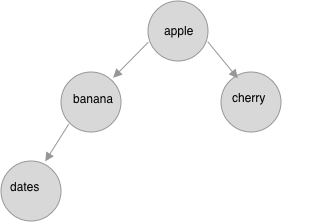

apple, banana, cherry, dates



**Think through the algorithm**

We are walking down the tree one level at a time. So we start with apple at the root, and next are banana and cherry, and next is dates.



1. start at the root node

2. visit the root node's left child (banana), then right child (cherry)

3. visit the left and right children of (banana) and (cherry).

#### **Queue**

Notice that we're waiting until we visit "cherry" before visiting "dates". It's like they're waiting in line. We can use a queue to keep track of the order.



#### **Define a queue class**

In [2]:
from collections import deque
# double ended queue (deque)
q = deque()
# enqueue an element
q.appendleft("apple")
q.appendleft("banana")
print(q)

deque(['banana', 'apple'])


In [3]:
# dequeue an element
q.pop()

'apple'

In [4]:
print(q)

deque(['banana'])


In [5]:
len(q)

1

In [6]:
from collections import deque


class Queue():

    def __init__(self):
        self.q = deque()

    def enq(self, value):
        self.q.appendleft(value)

    def deq(self):
        if len(self.q) > 0:
            return self.q.pop()

        return None

    def __len__(self):
        return len(self.q)

    def __repr__(self):

        if len(self.q) > 0:
            s = "<enqueue here>\n_________________\n"
            s += "\n_________________\n".join([str(item) for item in self.q])
            s += "\n_________________\n<dequeue here>"
            return s
        else:
            return "<queue is empty>"


In [7]:
q = Queue()
q.enq("apple")
q.enq("banana")
q.enq("cherry")
print(q)

<enqueue here>
_________________
cherry
_________________
banana
_________________
apple
_________________
<dequeue here>


In [8]:
print(q.deq())


apple


In [9]:
print(q)


<enqueue here>
_________________
cherry
_________________
banana
_________________
<dequeue here>


### **Walk through the steps with code**


We're going to translate what we're doing by hand into code, one step at a time. This will help us check if our code is doing what we expect it to do.



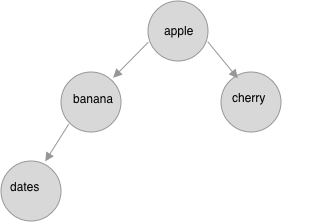

In [10]:
visit_order = list()
q = Queue()

# start at the root node and add it to the queue
node = tree.get_root()
q.enq(node)
print(q)

<enqueue here>
_________________
Node(apple)
_________________
<dequeue here>


In [11]:
# dequeue the next node in the queue. 
# "visit" that node
# also add its children to the queue

node = q.deq()
visit_order.append(node)
if node.has_left_child():
    q.enq(node.get_left_child())
if node.has_right_child():
    q.enq(node.get_right_child())
    
print(f"visit order: {visit_order}")
print(q)

visit order: [Node(apple)]
<enqueue here>
_________________
Node(cherry)
_________________
Node(banana)
_________________
<dequeue here>


In [12]:
# dequeue the next node (banana)
# visit it, and add its children (dates) to the queue 

node = q.deq()
visit_order.append(node)
if node.has_left_child():
    q.enq(node.get_left_child())
if node.has_right_child():
    q.enq(node.get_right_child())
    
print(f"visit order: {visit_order}")
print(q)

visit order: [Node(apple), Node(banana)]
<enqueue here>
_________________
Node(dates)
_________________
Node(cherry)
_________________
<dequeue here>


In [13]:
# dequeue the next node (cherry)
# visit it, and add its children (there are None) to the queue 

node = q.deq()
visit_order.append(node)
if node.has_left_child():
    q.enq(node.get_left_child())
if node.has_right_child():
    q.enq(node.get_right_child())
    
print(f"visit order: {visit_order}")
print(q)

visit order: [Node(apple), Node(banana), Node(cherry)]
<enqueue here>
_________________
Node(dates)
_________________
<dequeue here>


In [14]:
# dequeue the next node (dates)
# visit it, and add its children (there are None) to the queue 

node = q.deq()
visit_order.append(node)
if node.has_left_child():
    q.enq(node.get_left_child())
if node.has_right_child():
    q.enq(node.get_right_child())
    
print(f"visit order: {visit_order}")
print(q)

visit order: [Node(apple), Node(banana), Node(cherry), Node(dates)]
<queue is empty>


### **Task: write the breadth first search algorithm**


In [15]:
# BFS algorithm
def bfs(tree):
    # queue
    q = Queue()
    # visit order
    visit_order = list()
    # start at root
    node = tree.get_root()
    # add root to queue
    q.enq(node)
    
    # while queue is not empty
    while len(q) > 0:
        # dequeue the node
        node = q.deq()
        # visit that node
        visit_order.append(node)
        # add left child if exists
        if node.has_left_child():
            q.enq(node.get_left_child())
        # add right child if exists
        if node.has_right_child():
            q.enq(node.get_right_child())
        
    # return the visit order
    return visit_order

In [16]:
# check solution: should be: apple, banana, cherry, dates
bfs(tree)

[Node(apple), Node(banana), Node(cherry), Node(dates)]

### **Bonus Task: write a print function**


Define the print function for the Tree class. Nodes on the same level are printed on the same line.



For example, the tree we've been using would print out like this:



    Node(apple)
    Node(banana) | Node(cherry)
    Node(dates) | <empty> | <empty> | <empty>
    <empty> | <empty>

We'll have `<empty>` be placeholders so that we can keep track of which node is a child or parent of the other nodes.



`hint`: use a variable to keep track of which level each node is on. For instance, the root node is on level 0, and its child nodes are on level 1.



In [17]:
# starter code

class Tree():
    def __init__(self, value=None):
        self.root = Node(value)
        
    def get_root(self):
        return self.root
    
    """
    define the print function
    """
    def __repr__(self):
        level = 0
        q = Queue()
        visit_order = list()
        node = self.get_root()
        q.enq( (node,level) )
        while(len(q) > 0):
            node, level = q.deq()
            if node == None:
                visit_order.append( ("<empty>", level))
                continue
            visit_order.append( (node, level) )
            if node.has_left_child():
                q.enq( (node.get_left_child(), level +1 ))
            else:
                q.enq( (None, level +1) )
                
            if node.has_right_child():
                q.enq( (node.get_right_child(), level +1 ))
            else:
                q.enq( (None, level +1) )
                
        s = "Tree\n"
        previous_level = -1
        for i in range(len(visit_order)):
            node, level = visit_order[i]
            if level == previous_level:
                s += " | " + str(node) 
            else:
                s += "\n" + str(node)
                previous_level = level

        return s

In [18]:
# check solution
tree = Tree("apple")
tree.get_root().set_left_child(Node("banana"))
tree.get_root().set_right_child(Node("cherry"))
tree.get_root().get_left_child().set_left_child(Node("dates"))
print(tree)

Tree

Node(apple)
Node(banana) | Node(cherry)
Node(dates) | <empty> | <empty> | <empty>
<empty> | <empty>
